# Least squares solutions

  * https://github.com/scikit-hep/iminuit
  * https://iminuit.readthedocs.io/en/stable/notebooks/basic.html

## Exercise 11.1

After defining, in a dedicated library,
a linear function $\phi(x, \theta)$ with two parameters $\theta$:
  * Write a program that generates a set of *10* pairs $(x_i, y_i)$
    such that the points $x_i$ are randomly distributed along the horizontal axis
    between 0 and 10, and the points $y_i$ are constructed using the formula $y_i = \phi(x_i, \theta) + \epsilon_i$.
  * Plot the obtained sample, including the expected error bars.

In [1]:
# the model to be used for the exercise

def func (x, m, q) :
    '''
    reference model to be fitted
    '''
    return m * x + q

# initial parameters of the problem

m_true = 0.5
q_true = 1.1
epsilon_sigma = 0.3

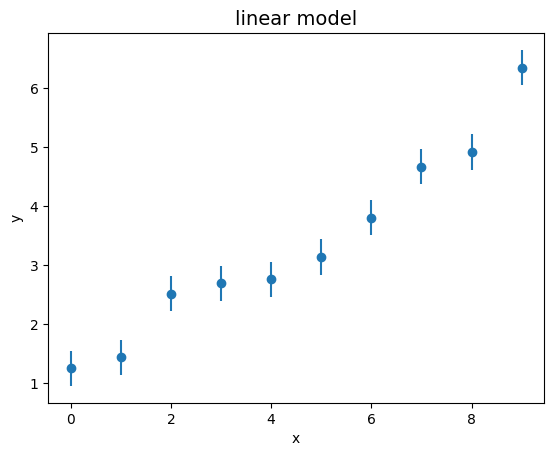

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from myrand import generate_TCL_ms

epsilons = generate_TCL_ms (0., epsilon_sigma, 10)

x_coord = np.arange (0, 10, 1)
y_coord = np.zeros (10)
for i in range (x_coord.size) :
    y_coord[i] = func (x_coord[i], m_true, q_true) + epsilons[i]

sigma_y = epsilon_sigma * np.ones (len (y_coord))
    
fig, ax = plt.subplots ()
ax.set_title ('linear model', size=14)
ax.set_xlabel ('x')
ax.set_ylabel ('y')
ax.errorbar (x_coord, y_coord, xerr = 0.0, yerr = sigma_y, linestyle = 'None', marker = 'o') 
plt.show ()

## Exercise 11.2

Use the ```iMinuit``` library to perform a fit on the simulated sample.
  * Check if the fit was successful.
  * Print the values of the determined parameters and their sigmas on the screen.

In [3]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

# generate a least-squares cost function
least_squares = LeastSquares (x_coord, y_coord, sigma_y, func)
my_minuit = Minuit (least_squares, m = 0, q = 0)  # starting values for m and q
my_minuit.migrad ()  # finds minimum of least_squares function
my_minuit.hesse ()   # accurately computes uncertainties
# NB: adding additional instructions prevents the automatic visualisation of the fit result

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.68 (χ²/ndof = 1.7)      │              Nfcn = 40               │
│ EDM = 6.7e-22 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │   0.514   │   0.033   │            │            │         │         │       │
│ 1 │ q    │   1.04    │   0.18    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       m       q │
├───┼─────────────────┤
│ m │ 0.00109 -0.0049 │
│ q │ -0.0049  0.0311 │
└───┴─────────────────┘

In [4]:
# information about the function minimum can be directly accessed with Minuit.fmin
my_minuit.fmin

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.68 (χ²/ndof = 1.7)      │              Nfcn = 40               │
│ EDM = 6.7e-22 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘

In [5]:
# global characteristics of the fit
is_valid = my_minuit.valid
print ('success of the fit: ', is_valid)

success of the fit:  True


In [6]:
# fit parameters
for par, val, err in zip (my_minuit.parameters, my_minuit.values, my_minuit.errors) :
    print(f'{par} = {val:.3f} +/- {err:.3f}') # formatted output
    
m_fit = my_minuit.values[0]
q_fit = .values[1]

m = 0.514 +/- 0.033
q = 1.041 +/- 0.176


## Exercise 11.3

  * Calculate the value of $Q^2$ using the points and the fitted function
    obtained in the previous exercise.
  * Compare the value obtained with ```iminuit``` with the calculated one.
  * Print the value of the degrees of freedom of the fit

In [7]:
Q_squared = my_minuit.fval
print ('value of the fit Q-squared', Q_squared)
N_dof = my_minuit.ndof
print ('value of the number of degrees of freedom', N_dof)

value of the fit Q-squared 13.679824119274024
value of the number of degrees of freedom 8.0


In [8]:
Q_squared_calc = 0.
for x, y, ey in zip (x_coord, y_coord, sigma_y) :
    Q_squared_calc = Q_squared_calc + pow ( (y - func (x, m_fit, q_fit)) /ey , 2 )  
print ('Difference between Q-squared values:', Q_squared_calc - Q_squared) 

Difference between Q-squared values: 3.552713678800501e-15


## Exercise 11.4

Using the toy experiments technique,
generate 10,000 fit experiments with the model studied in the previous exercises
and fill a histogram with the obtained values of $Q^2$.
  * Compare the expected value of $Q^2$ obtained from the toy experiments
    with the degrees of freedom of the problem.

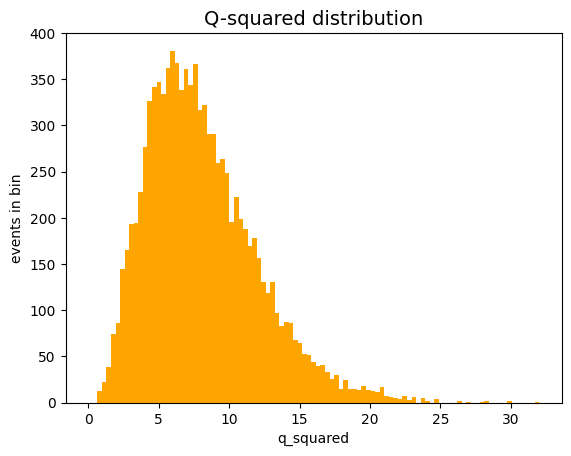

average Q_squared expected value: 8.10095057614301


In [10]:
from math import floor
from stats import stats

N_toys = 10000
Q_squares = []
x_coord_toy = np.arange (0, 10, 1)
y_coord_toy = np.zeros (10)

for i_toy in range (N_toys) :
    epsilons_toy = generate_TCL_ms (0., epsilon_sigma, 10)
    for i in range (x_coord_toy.size) :
        y_coord_toy[i] = func (x_coord_toy[i], m_true, q_true) + epsilons_toy[i]
    least_squares = LeastSquares (x_coord_toy, y_coord_toy, sigma_y, func)
    my_minuit_toy = Minuit (least_squares, m = 0, q = 0)  # starting values for m and q
    my_minuit_toy.migrad ()  # finds minimum of least_squares function
    my_minuit_toy.hesse ()   # accurately computes uncertainties
    if my_minuit_toy.valid : 
        Q_squares.append (my_minuit_toy.fval)

fig, ax = plt.subplots ()
ax.set_title ('Q-squared distribution', size=14)
ax.set_xlabel('q_squared')
ax.set_ylabel('events in bin')
bin_edges = np.linspace (0, 4 * N_dof, floor (N_toys/100))   # edges o the histogram bins
ax.hist (Q_squares,
         bins = bin_edges,
         color = 'orange',
        )
plt.show ()

Q_squares_stats = stats (Q_squares)
print ('average Q_squared expected value:', Q_squares_stats.mean ())

## Exercise 11.5

Modify the previous program by deliberately changing the experimental uncertainty
associated with the points $y_i$ in the sample and verify that it's possible to recover the 
uncertainty used in generating the points
through the expected value of the variable $Q^2$.

In [15]:
from math import floor, sqrt
from stats import stats

N_toys = 10000
Q_squares_mod = []
x_coord_toy = np.arange (0, 10, 1)
y_coord_toy = np.zeros (10)
epsilon_sigma_mod = 0.4 * epsilon_sigma

for i_toy in range (N_toys) :
    epsilons_toy = generate_TCL_ms (0., epsilon_sigma_mod, 10)
    for i in range (x_coord_toy.size) :
        y_coord_toy[i] = func (x_coord_toy[i], m_true, q_true) + epsilons_toy[i]
    least_squares = LeastSquares (x_coord_toy, y_coord_toy, sigma_y, func)
    my_minuit_toy = Minuit (least_squares, m = 0, q = 0)  # starting values for m and q
    my_minuit_toy.migrad ()  # finds minimum of least_squares function
    my_minuit_toy.hesse ()   # accurately computes uncertainties
    if my_minuit_toy.valid : 
        Q_squares_mod.append (my_minuit_toy.fval)

Q_squares_mod_stats = stats (Q_squares_mod)
print ('average Q_squared expected value:', Q_squares_mod_stats.mean ())
print ('sigma scale factor:', sqrt (Q_squares_mod_stats.mean () / N_dof))
print ('sigma:', epsilon_sigma_mod / sqrt (Q_squares_mod_stats.mean () / N_dof))

average Q_squared expected value: 1.2811914787495968
sigma scale factor: 0.400186125251363
sigma: 0.2998604709861597


## Exercise 11.6

Add to Exercise 11.3 the screen printout of the entire covariance matrix
of the fit parameters.

In [16]:
print (my_minuit.covariance)

┌───┬─────────────────┐
│   │       m       q │
├───┼─────────────────┤
│ m │ 0.00109 -0.0049 │
│ q │ -0.0049  0.0311 │
└───┴─────────────────┘


In [19]:
print ('variance of the first parameter (m):', my_minuit.covariance[0][0])
print ('variance of the second parameter (q):', my_minuit.covariance[1][1])
print ('covariance of the two parameters:', my_minuit.covariance[1][0])


variance of the first parameter (m): 0.0010909097624919293
variance of the second parameter (q): 0.031090928408796126
covariance of the two parameters: -0.004909094504830553


## Exercise 11.7

Repeat the fitting exercise for a parabolic trend.

In [25]:
def para (x, a, b, c) :
    '''
    reference model to be fitted
    '''
    return a + b * x + c * x * x

# initial parameters of the problem

a_true = -1.
b_true = 0.7
c_true = 0.3

epsilon_sigma = 1.5

In [26]:
epsilons = generate_TCL_ms (0., epsilon_sigma, 10)

x_coord = np.arange (0, 10, 1)
y_coord = np.zeros (10)
for i in range (x_coord.size) :
    y_coord[i] = para (x_coord[i], a_true, b_true, c_true) + epsilons[i]

sigma_y = epsilon_sigma * np.ones (len (y_coord))

least_squares = LeastSquares (x_coord, y_coord, sigma_y, para)
my_minuit = Minuit (least_squares, a = 0., b = 0., c = 0.)
my_minuit.migrad ()  # finds minimum of least_squares function
my_minuit.hesse ()   # accurately computes uncertainties


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.25 (χ²/ndof = 2.2)      │              Nfcn = 70               │
│ EDM = 4.16e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    0.5    │    1.2    │            │            │         │         │       │
│ 1 │ b    │    0.2    │    0.6    │            │            │         │         │       │
│ 2 │ c    │   0.34    │   0.07    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │    1.39    -0.6   0.051 │
│ b │    -0.6   0.372  -0.038 │
│ c │   0.051  -0.038 0.00426 │
└───┴─────────────────────────┘

(<Figure size 640x480 with 9 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='b'>, <Axes: >, <Axes: >],
        [<Axes: xlabel='a', ylabel='c'>, <Axes: xlabel='b'>,
         <Axes: xlabel='c'>]], dtype=object))

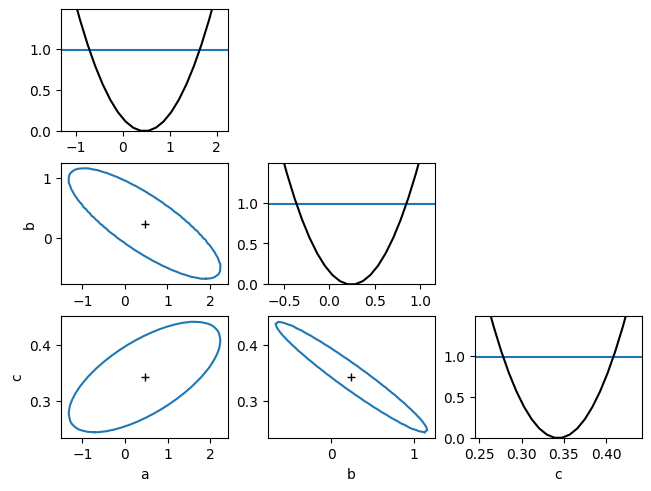

In [27]:
# show the likelihood scans for the various parameters in 1D and 2D
my_minuit.draw_mnmatrix()